In [1]:
import stata_setup
from src.constants import sys_dir, stat_edi

In [2]:
stata_setup.config(sys_dir, stat_edi)


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 2-core, expiring 13 Jun 2023
Serial number: 501709388294
  Licensed to: cegaadmin
               UC Berkeley

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.

Running /Users/cegaadmin/Documents/Stata/ado/personal/profile.do ...


In [3]:
%%stata?

Docstring:
Execute one line or a block of Stata commands.

When the line magic command **%stata** is used, a one-line Stata 
command can be specified and executed, as it would be in Stata's 
Command window. When the cell magic command **%%stata** is used, a 
block of Stata commands can be specified and executed all at once. 
This is similar to executing a series of commands from a do-file.

Cell magic syntax:

    %%stata [-d DATA] [-f DFLIST|ARRLIST] [-force]
     [-doutd DATAFRAME] [-douta ARRAY] [-foutd FRAMELIST] [-fouta FRAMELIST]
     [-ret DICTIONARY] [-eret DICTIONARY] [-sret DICTIONARY] [-qui] [-nogr]
     [-gw WIDTH] [-gh HEIGHT]

    Optional arguments:

      -d DATA               Load a NumPy array or pandas dataframe 
                            into Stata as the current working dataset.

      -f DFLIST|ARRLIST     Load one or multiple NumPy arrays or 
                            pandas dataframes into Stata as frames. 
                            The arrays and datafram


. sysuse auto.dta
(1978 automobile data)

. summ

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        make |          0
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41
       rep78 |         69    3.405797    .9899323          1          5
    headroom |         74    2.993243    .8459948        1.5          5
-------------+---------------------------------------------------------
       trunk |         74    13.75676    4.277404          5         23
      weight |         74    3019.459    777.1936       1760       4840
      length |         74    187.9324    22.26634        142        233
        turn |         74    39.64865    4.399354         31         51
displacement |         74    197.2973    91.83722         79        425
-------------+---------------------------------------------

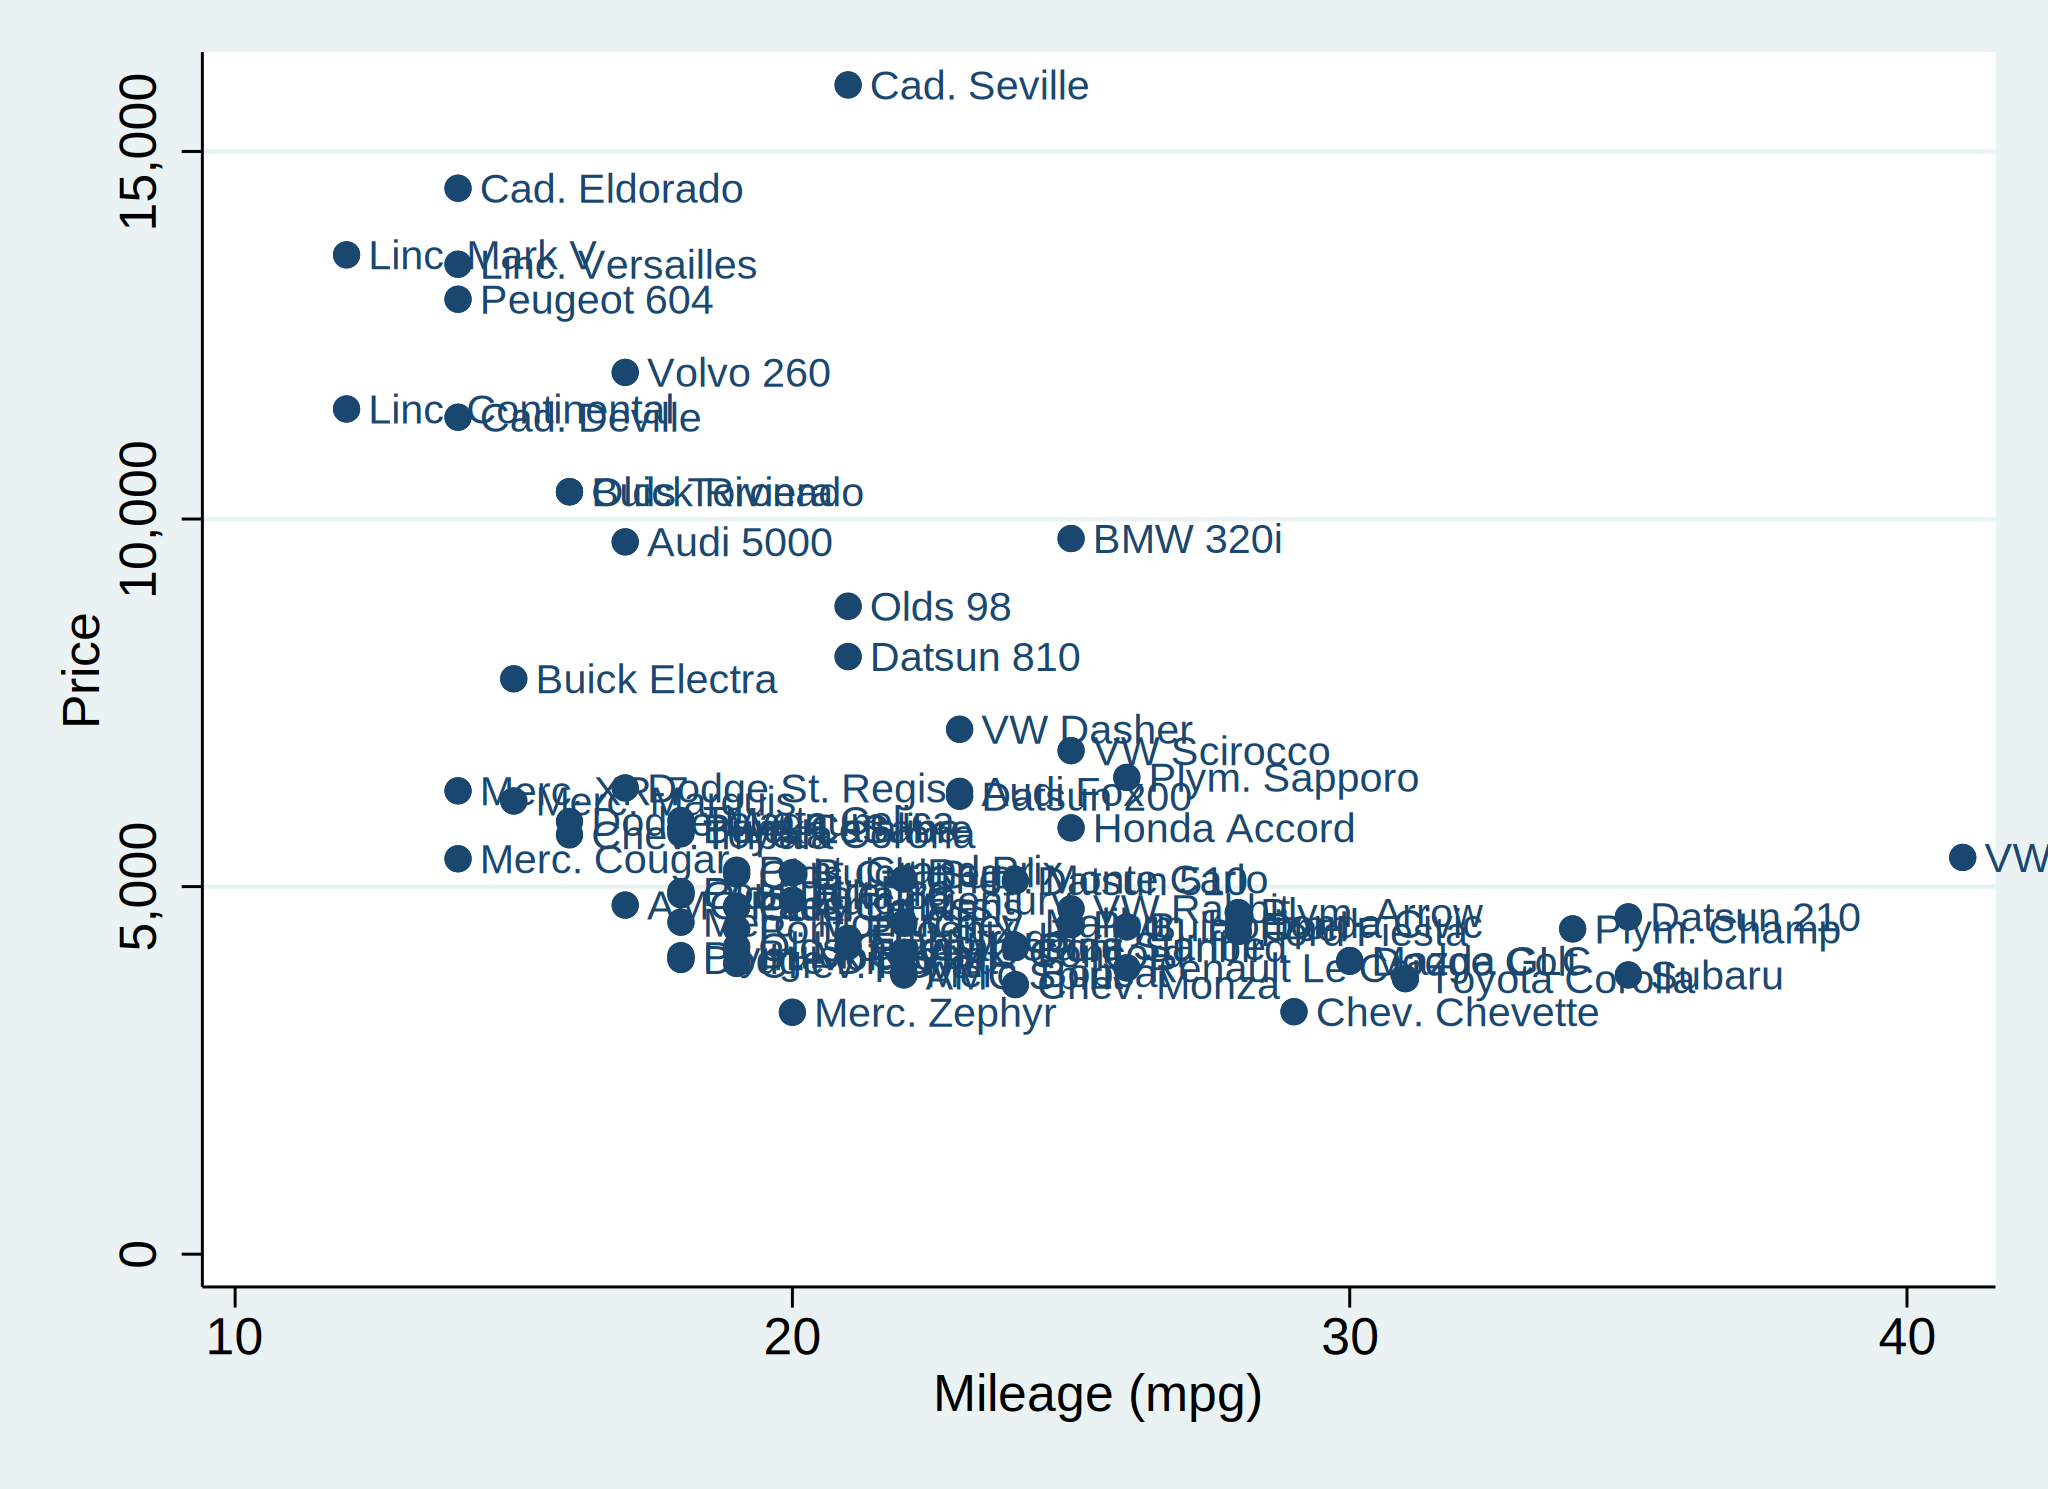

In [4]:
%%stata
sysuse auto.dta
summ
desc
reg price mpg rep78 headroom trunk weight length turn displacement gear_ratio foreign, r
scatter price mpg, mlabel(make)

In [5]:
%%stata

sysuse auto, clear
summarize mpg


. 
. sysuse auto, clear
(1978 automobile data)

. summarize mpg

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         74     21.2973    5.785503         12         41

. 


In [6]:
%%stata -eret myeret
reg mpg price i.foreign
ereturn list


. reg mpg price i.foreign

      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(2, 71)        =     23.01
       Model |  960.866305         2  480.433152   Prob > F        =    0.0000
    Residual |  1482.59315        71  20.8815937   R-squared       =    0.3932
-------------+----------------------------------   Adj R-squared   =    0.3761
       Total |  2443.45946        73  33.4720474   Root MSE        =    4.5696

------------------------------------------------------------------------------
         mpg | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       price |   -.000959   .0001815    -5.28   0.000     -.001321    -.000597
             |
     foreign |
    Foreign  |   5.245271   1.163592     4.51   0.000     2.925135    7.565407
       _cons |   25.65058   1.271581    20.17   0.000     23.11512    28

In [7]:
myeret['e(b)']


array([[-9.59034169e-04,  0.00000000e+00,  5.24527100e+00,
         2.56505843e+01]])

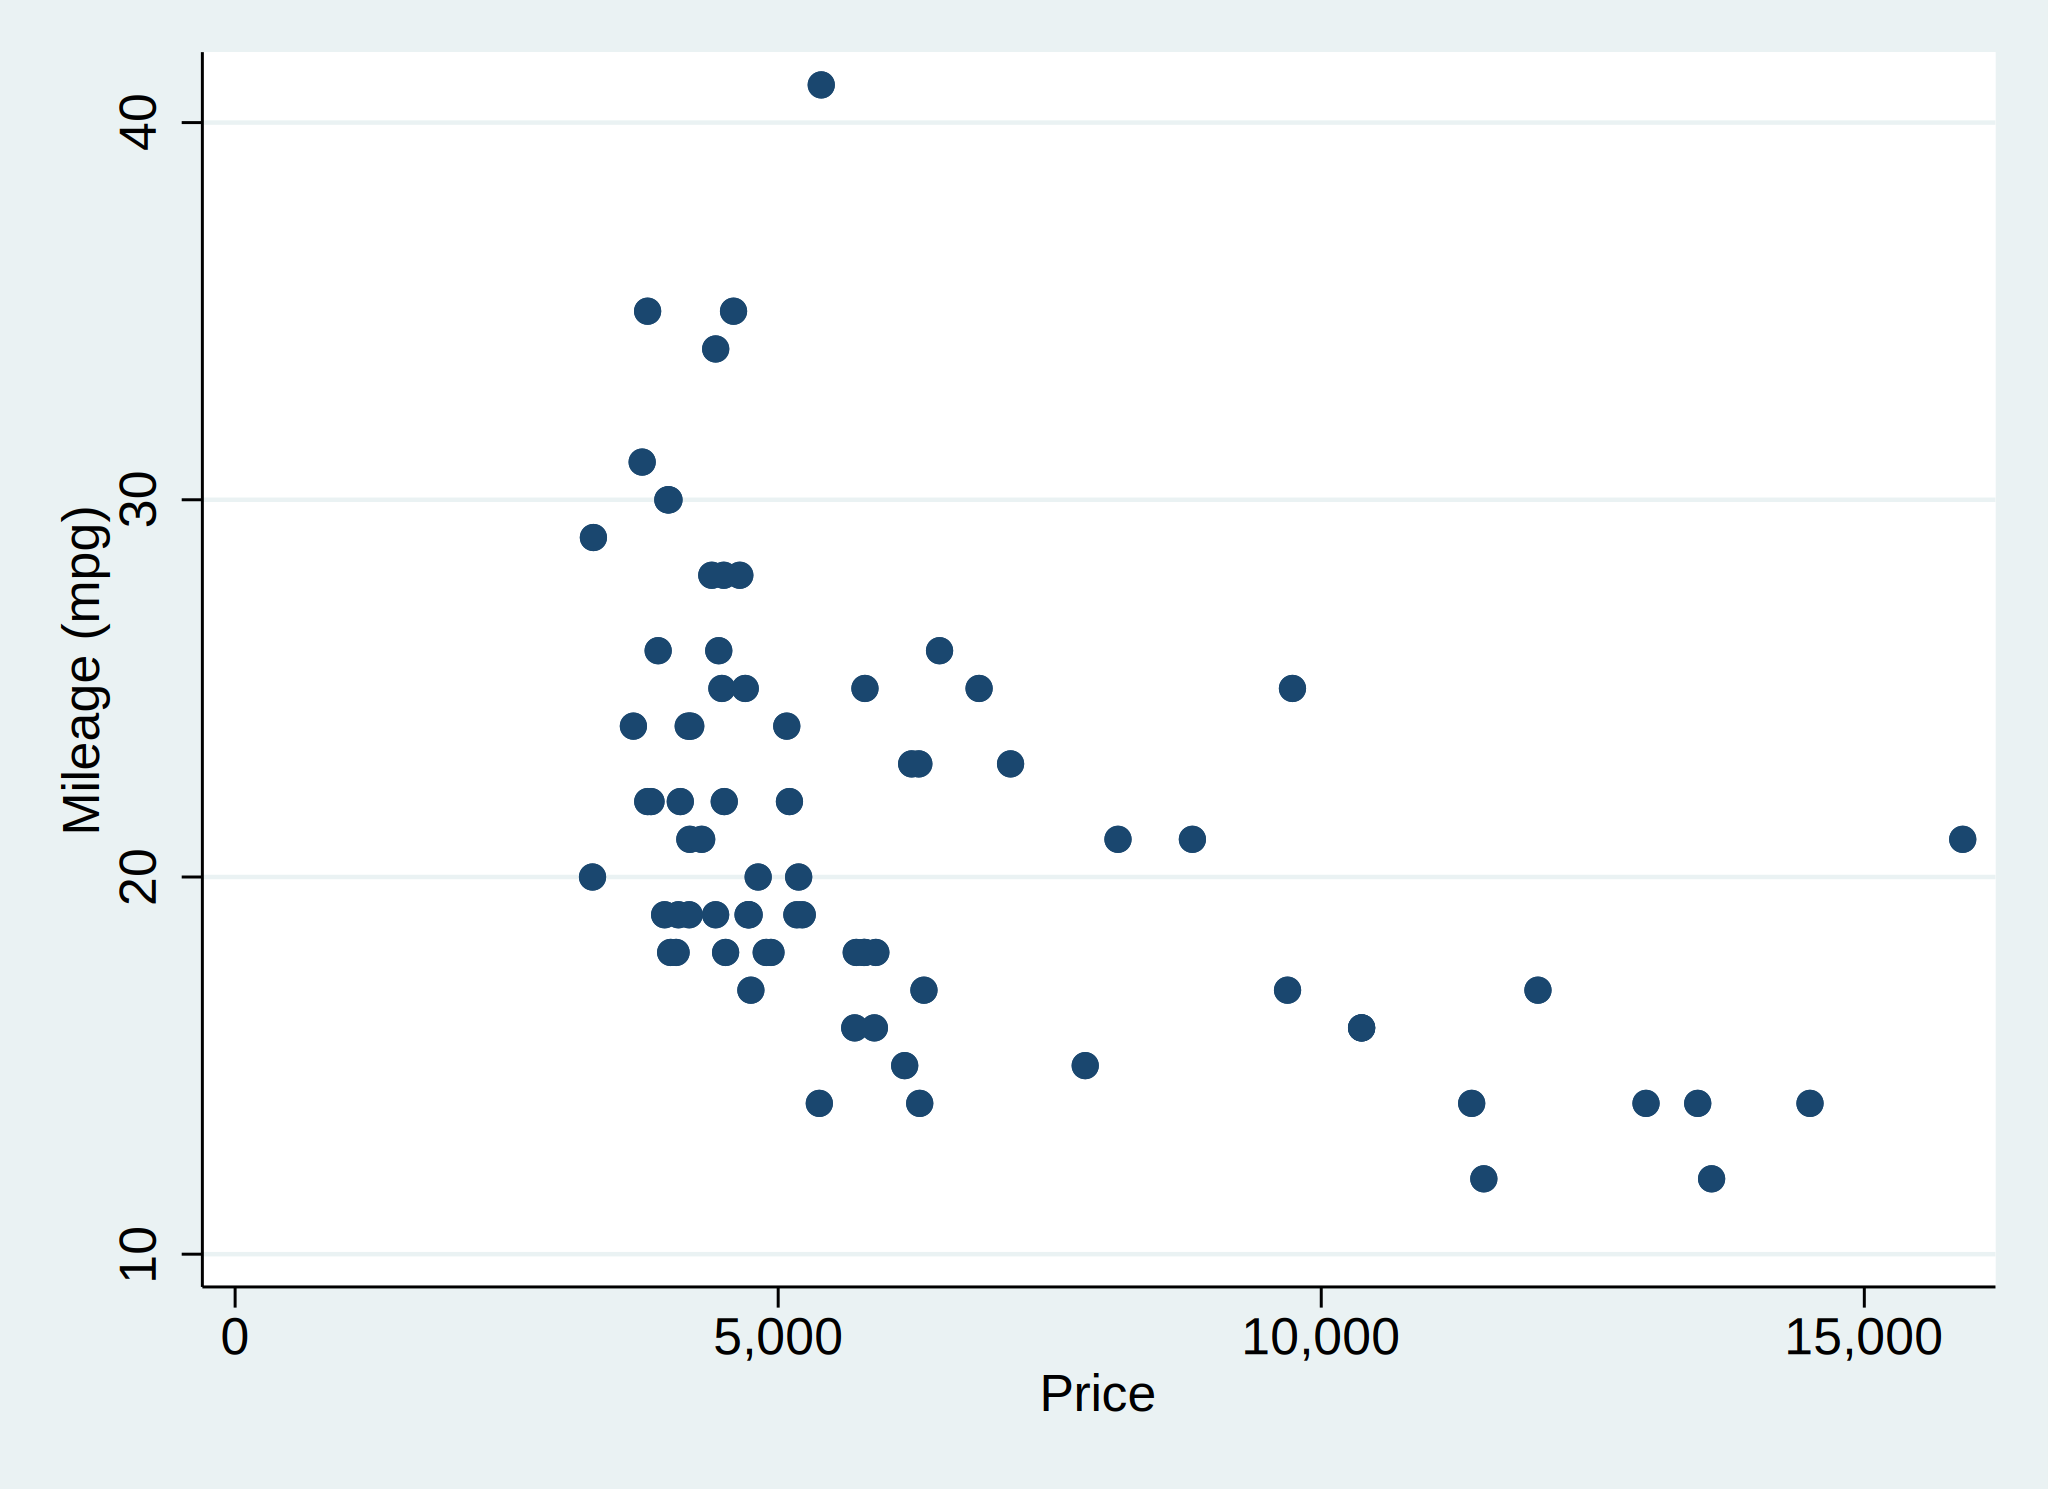

In [8]:
%stata scatter mpg price


In [9]:
%%mata
/* function to create an nxn identity matrix */
real matrix id(real scalar n)
{
    real scalar i
    real matrix res
 
    res = J(n, n, 0)
    for (i=1; i<=n; i++) {
        res[i,i] = 1
    }
    return(res)
}
 
/* create a 3x3 indentity matrix */
A = id(3)
A


. mata
------------------------------------------------- mata (type end to exit) -----
: /* function to create an nxn identity matrix */
: real matrix id(real scalar n)
> {
>     real scalar i
>     real matrix res
>  
>     res = J(n, n, 0)
>     for (i=1; i<=n; i++) {
>         res[i,i] = 1
>     }
>     return(res)
> }

:  
: /* create a 3x3 indentity matrix */
: A = id(3)

: A
[symmetric]
       1   2   3
    +-------------+
  1 |  1          |
  2 |  0   1      |
  3 |  0   0   1  |
    +-------------+

: end
-------------------------------------------------------------------------------

. 


In [10]:
from pystata import stata
stata.pdataframe_to_data(nhanes2, force=True)
stata.run('logistic highbp c.age##c.weight')

NameError: name 'nhanes2' is not defined

In [ ]:
myereturn = stata.get_ereturn()
myereturn['e(b)'], myereturn['e(V)']


. sysuse auto.dta
(1978 automobile data)

. summ

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        make |          0
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41
       rep78 |         69    3.405797    .9899323          1          5
    headroom |         74    2.993243    .8459948        1.5          5
-------------+---------------------------------------------------------
       trunk |         74    13.75676    4.277404          5         23
      weight |         74    3019.459    777.1936       1760       4840
      length |         74    187.9324    22.26634        142        233
        turn |         74    39.64865    4.399354         31         51
displacement |         74    197.2973    91.83722         79        425
-------------+---------------------------------------------

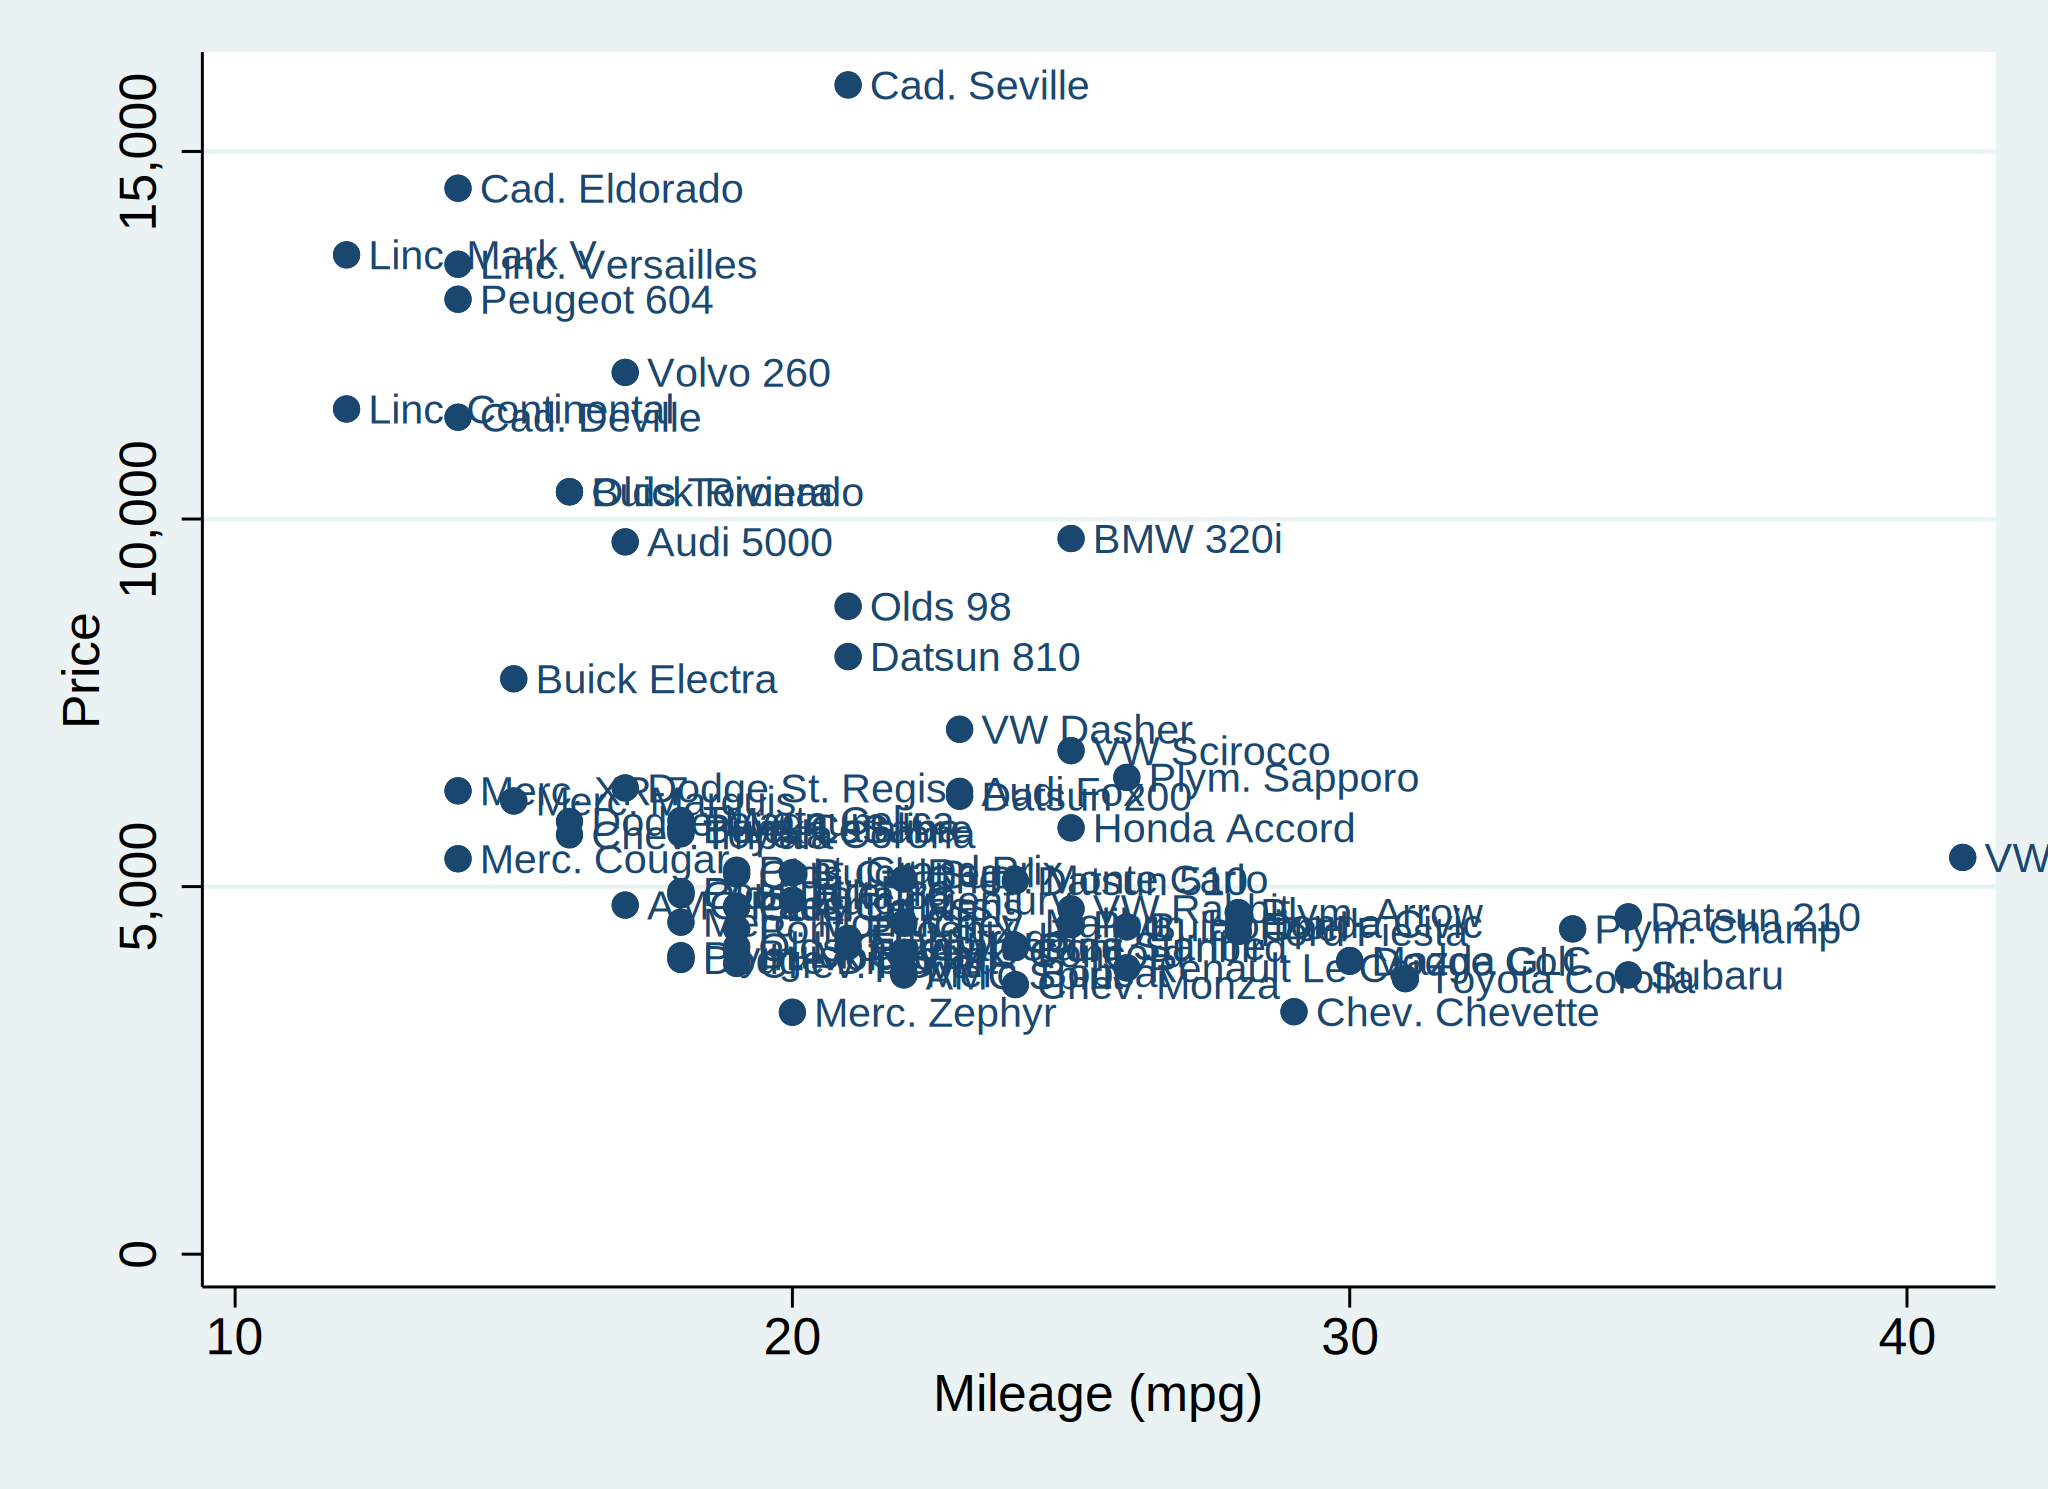

In [12]:
%%stata
sysuse auto.dta
summ
desc
reg price mpg rep78 headroom trunk weight length turn displacement gear_ratio foreign, r
scatter price mpg, mlabel(make)
graph export "../outputs/images/price-mpg.png", replace

In [13]:
%%stata -doutd car_df

sysuse auto.dta


. 
. sysuse auto.dta
(1978 automobile data)

. 


In [14]:
car_df

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.000000e+00,2.5,11,2930,186,40,121,3.58,0
1,AMC Pacer,4749,17,3.000000e+00,3.0,11,3350,173,40,258,2.53,0
2,AMC Spirit,3799,22,8.988466e+307,3.0,12,2640,168,35,121,3.08,0
3,Buick Century,4816,20,3.000000e+00,4.5,16,3250,196,40,196,2.93,0
4,Buick Electra,7827,15,4.000000e+00,4.0,20,4080,222,43,350,2.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.000000e+00,2.5,12,2160,172,36,97,3.74,1
70,VW Diesel,5397,41,5.000000e+00,3.0,15,2040,155,35,90,3.78,1
71,VW Rabbit,4697,25,4.000000e+00,3.0,15,1930,155,35,89,3.78,1
72,VW Scirocco,6850,25,4.000000e+00,2.0,16,1990,156,36,97,3.78,1


In [15]:
car_df['mpg_sq'] = car_df.mpg ** 2


In [16]:
%%stata -d car_df
reg                   ///
    price             ///
    mpg               ///
    mpg_sq            ///
    rep78             ///
    headroom          ///
    trunk             ///
    weight            ///
    length            ///
    turn              ///
    displacement      ///
    gear_ratio        ///
    foreign, r



. reg                ///
>     price          ///
>     mpg            ///
>     mpg_sq            ///
>     rep78         ///
>     headroom         ///
>     trunk         ///
>     weight         ///
>     length         ///
>     turn         ///
>     displacement         ///
>     gear_ratio         ///
>     foreign, r

Linear regression                               Number of obs     =         69
                                                F(11, 57)         =      10.19
                                                Prob > F          =     0.0000
                                                R-squared         =     0.6002
                                                Root MSE          =     2011.4

------------------------------------------------------------------------------
             |               Robust
       price | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 